## **Machine Learning-Based Prediction of Cardiovascular Disease Risk Using Lifestyle Factors**
by Le Ngoc Uyen Phuong (ITDSIU20079)

# **0. Libraries Import**

In [1]:
import os
os.chdir('./DATA')

In [2]:
import pandas as pd
import numpy as np
from tabulate import tabulate

import matplotlib.pyplot as plt

import pickle as pkl

In [3]:
%matplotlib inline

In [4]:
import warnings

warnings.filterwarnings('ignore')

# **1. Data Collection**

In [5]:
df = pd.read_csv('df_merged.csv')
df

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGY,...,PHAGUMMN,PHQ050,PHAANTHR,PHAANTMN,PHQ060,PHASUPHR,PHASUPMN,PHAFSTHR,PHAFSTMN,PHDSESN
0,62161.0,7.0,2.0,1.0,22.0,NaN,3.0,3.0,2.0,NaN,...,NaN,2.0,NaN,NaN,2.0,NaN,NaN,14.0,37.0,5.397605e-79
1,62162.0,7.0,2.0,2.0,3.0,NaN,1.0,1.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,62163.0,7.0,2.0,1.0,14.0,NaN,5.0,6.0,2.0,14.0,...,NaN,2.0,NaN,NaN,2.0,NaN,NaN,17.0,55.0,1.000000e+00
3,62164.0,7.0,2.0,2.0,44.0,NaN,3.0,3.0,1.0,NaN,...,NaN,2.0,NaN,NaN,2.0,NaN,NaN,11.0,6.0,5.397605e-79
4,62165.0,7.0,2.0,2.0,14.0,NaN,4.0,4.0,2.0,14.0,...,NaN,2.0,NaN,NaN,2.0,NaN,NaN,12.0,11.0,5.397605e-79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52587,124818.0,66.0,2.0,1.0,40.0,NaN,4.0,4.0,1.0,NaN,...,NaN,2.0,NaN,NaN,2.0,NaN,NaN,6.0,4.0,1.000000e+00
52588,124819.0,66.0,2.0,1.0,2.0,NaN,4.0,4.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52589,124820.0,66.0,2.0,2.0,7.0,NaN,3.0,3.0,2.0,NaN,...,NaN,2.0,NaN,NaN,2.0,NaN,NaN,4.0,42.0,1.000000e+00
52590,124821.0,66.0,2.0,1.0,63.0,NaN,4.0,4.0,1.0,NaN,...,NaN,2.0,NaN,NaN,2.0,NaN,NaN,10.0,8.0,5.397605e-79


In [6]:
df_original = df.copy()
df = df_original.copy()

# **2. Data Preprocessing**

## **2.1. Data Cleaning**

In [7]:
# Function to check dataset information

def data_check(data):
  print(f"Total number of rows: {len(data)}")
  print(f"Total number of columns: {len(data.columns)}\n")
  print('\033[1m' + 'COLUMN_NAME' + ' ' * 9 + 'DATA_TYPE' + ' ' * 11 + 'COUNT_UNIQUE' + ' ' * 8 +
        'COUNT_NULL' + ' ' * 10 + 'PERCENT_NULL' + ' ' * 8 + 'UNIQUE_VALUE' + '\033[0m')

  for col in data.columns:
    dtype = str(data[col].dtypes)
    num_unique = data[col].nunique()
    num_null = data[col].isna().sum()
    null_pct = num_null / len(data) * 100

    unique_val = (', '.join([str(val) for val in data[col].unique().tolist()]) if len(data[col].unique().tolist()) < 10
                  else ', '.join([str(val) for val in data[col].unique().tolist()][:10]) + ',...')

    print(col + ' ' * (20 - len(col)) + str(dtype) + ' ' * (20 - len(dtype)) + str(num_unique) + ' ' * (20 - len(str(num_unique))) +
          str(num_null) + ' ' * (20 - len(str(num_null))) + f'{null_pct:.2f}' + ' ' * (20 - len(f'{null_pct:.2f}')) + unique_val)

In [8]:
# Change all rows with values 7 and 9 in label columns to NaN and change 2 to 0

for col in ['MCQ160B', 'MCQ160C', 'MCQ160E', 'MCQ160F']:
  df[col] = np.where(~df[col].isin([1, 2]), np.nan, np.where(df[col] == 1, 1, 0))

In [9]:
# Drop all rows with 4 label columns are null

df = df[(df['MCQ160B'].notna()) & (df['MCQ160C'].notna()) & (df['MCQ160E'].notna()) & (df['MCQ160F'].notna())]

In [10]:
# Change and drop some ambiguous values

to_change_cols = ['DMDEDUC2', 'ALQ101', 'ALQ120U', 'ALQ151', 'ALQ111', 'BPQ020', 'BPQ030', 'BPQ040A', 'BPQ050A', 'BPQ057', 'BPQ056',
                  'BPQ059', 'BPQ080', 'BPQ060', 'BPQ070', 'BPQ090D', 'BPQ100D', 'CDQ001', 'CDQ002', 'CDQ008', 'CDQ010', 'DMDCITZN',
                  'DMDEDUC2', 'DMDHREDU', 'DMDHSEDU', 'DMDHREDZ', 'MCQ010', 'MCQ035', 'MCQ053', 'MCQ070', 'MCQ080', 'MCQ082', 'MCQ086',
                  'MCQ092', 'MCQ140', 'MCQ160A', 'MCQ195', 'MCQ160N', 'MCQ160G', 'MCQ160M', 'MCQ160K', 'OSQ230', 'MCQ160L', 'MCQ220',
                  'MCQ300A', 'MCQ300B', 'MCQ300C', 'MCQ370A', 'MCQ370B', 'MCQ370C', 'MCQ370D', 'AGQ030', 'MCQ160O', 'MCQ203', 'MCQ520',
                  'MCQ550', 'MCQ560', 'MCQ366A', 'MCQ366B', 'MCQ366C', 'MCQ366D', 'MCQ371A', 'MCQ371B', 'MCQ371C', 'MCQ371D', 'MCQ160P',
                  'MCQ160B', 'MCQ160C', 'MCQ160E', 'MCQ160F', 'MCQ365A', 'MCQ365B', 'MCQ365C', 'MCQ365D', 'MCQ084', 'MCQ170M', 'MCQ540',
                  'ALQ110', 'MCQ160D', 'DMQMILIZ']

for col in to_change_cols:
  df[col] = np.where(df[col].isin([7, 9]), np.nan, df[col])

for col in ['ALQ120Q', 'ALQ130', 'ALQ141Q', 'BPD035', 'ALQ170']:
  df[col] = np.where(df[col].isin([777, 999]), np.nan, df[col])

for col in ['MCQ025']:
  df[col] = np.where(df[col].isin([77777, 99999]), np.nan, df[col])

for col in ['DMDYRSUS', 'DMDMARTL', 'DMDHRBR4', 'DMDHRMAR', 'DMDHRMAZ', 'DMDMARTZ', 'DMDBORN4']:
  df[col] = np.where(df[col].isin([77, 99]), np.nan, df[col])

for col in ['BPAARM', 'BPXML1']:
  df[col] = np.where(df[col] == 888, np.nan, df[col])

for col in ['BPXPTY', 'BPAEN1', 'BPAEN2', 'BPAEN3']:
  df[col] = np.where(df[col] == 8, np.nan, df[col])

In [11]:
# Drop all columns with more than 90% null

to_drop = []

for col in df.columns:
  if df[col].isna().sum() / len(df) > 0.9:
    to_drop.append(col)

df = df.drop(columns = to_drop)

In [12]:
# Drop column 'BPAOARM'

df = df.drop(columns = ['BPAOARM'])

In [13]:
# Change 2 to 0 for some columns

for col in df.columns:
  if df[col].nunique() == 2:
    df[col] = np.where(df[col] == 1, 1, 0)

In [14]:
data_check(df)

Total number of rows: 31619
Total number of columns: 243

COLUMN_NAME         DATA_TYPE           COUNT_UNIQUE        COUNT_NULL          PERCENT_NULL        UNIQUE_VALUE
SEQN                float64             31619               0                   0.00                62161.0, 62164.0, 62169.0, 62172.0, 62174.0, 62176.0, 62177.0, 62178.0, 62179.0, 62180.0,...
SDDSRVYR            float64             5                   0                   0.00                7.0, 8.0, 9.0, 10.0, 66.0
RIDSTATR            int32               2                   0                   0.00                0, 1
RIAGENDR            int32               2                   0                   0.00                1, 0
RIDAGEYR            float64             61                  0                   0.00                22.0, 44.0, 21.0, 43.0, 80.0, 34.0, 51.0, 55.0, 35.0, 75.0,...
RIDRETH1            float64             5                   0                   0.00                3.0, 5.0, 4.0, 1.0, 2.0
RIDRETH3     

In [15]:
# Impute missing values using mean

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')
df_imputed = imputer.fit_transform(df)

df = pd.DataFrame(data = df_imputed, columns = df.columns)

In [16]:
df.to_csv('../FINAL/df_impute_median.csv', index = False)

In [17]:
data_check(df)

Total number of rows: 31619
Total number of columns: 243

COLUMN_NAME         DATA_TYPE           COUNT_UNIQUE        COUNT_NULL          PERCENT_NULL        UNIQUE_VALUE
SEQN                float64             31619               0                   0.00                62161.0, 62164.0, 62169.0, 62172.0, 62174.0, 62176.0, 62177.0, 62178.0, 62179.0, 62180.0,...
SDDSRVYR            float64             5                   0                   0.00                7.0, 8.0, 9.0, 10.0, 66.0
RIDSTATR            float64             2                   0                   0.00                0.0, 1.0
RIAGENDR            float64             2                   0                   0.00                1.0, 0.0
RIDAGEYR            float64             61                  0                   0.00                22.0, 44.0, 21.0, 43.0, 80.0, 34.0, 51.0, 55.0, 35.0, 75.0,...
RIDRETH1            float64             5                   0                   0.00                3.0, 5.0, 4.0, 1.0, 2.0
RIDRE

In [18]:
df = pd.read_csv('../FINAL/df_impute_median.csv')

## **2.2. Label Assignment**

In [19]:
df = df.drop(columns = ['SEQN', 'LBDSTBSI', 'INDFMPIR', 'DMDYRSUS', 'SDDSRVYR', 'BPD035', 'MCQ180A', 'MCQ195', 'RIDRETH3', 'RIDRETH1'])

In [20]:
# Create Label column

df['Label'] = np.where(df['MCQ160B'] + df['MCQ160C'] + df['MCQ160E'] + df['MCQ160F'] == 0, 0, 1)
df = df.drop(columns = ['MCQ160B', 'MCQ160C', 'MCQ160E', 'MCQ160F'])

In [21]:
df['Label'].value_counts()

Label
0    28286
1     3333
Name: count, dtype: int64

In [22]:
df = pd.concat([df[df['Label'] == 1], df[df['Label'] == 0].sample(n = 6000, random_state = 1204)]).sample(frac = 1, random_state = 1204)

In [23]:
df.value_counts('Label')

Label
0    6000
1    3333
Name: count, dtype: int64

In [24]:
df_train = df.iloc[:5000]
df_val = df.iloc[5000:5500]
df_test = df.iloc[5500:]

## **2.3. Data types change**

In [25]:
# Change datatype of float to int for some columns

float_cols = ['BPXML1', 'BPXML1', 'BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2', 'BPXSY3', 'BPXDI3', 'LBXSAL', 'LBDSBUSI', 'LBXSCA', 'LBDSCASI',
              'LBXSPH', 'LBDSPHSI', 'LBXSTB', 'LBDSTBSI', 'LBXSTP', 'LBXSGB', 'PHAFSTHR', 'PHAFSTMN', 'BMXARML', 'LBDHDDSI', 'LBXSUA',
              'LBDSUASI', 'BMXLEG', 'BMXSAD1', 'BMXSAD2', 'BMDAVSAD', 'LBDLDLSI', 'LBDLDMSI', 'LBDLDNSI', 'LBDSIRSI', 'LBXSKSI', 'BMXARMC',
              'LBDTCSI', 'LBDSCHSI', 'LBXSCR', 'LBDSCRSI', 'LBDSGLSI', 'LBDTRSI', 'INDFMPIR', 'BMXHT', 'BMXBMI', 'BMXWAIST', 'BMXHIP',
              'LBDSTRSI', 'BMXWT', 'WTSAFPRP', 'WTINTPRP', 'WTMECPRP', 'WTSAF2YR', 'WTINT2YR', 'WTMEC2YR']

for col in df.columns:
  if df[col].nunique() <= 20:
    df[col] = np.floor(pd.to_numeric(df[col], errors = 'coerce')).astype('Int64')

    df_train[col] = np.floor(pd.to_numeric(df_train[col], errors = 'coerce')).astype('Int64')
    df_val[col] = np.floor(pd.to_numeric(df_val[col], errors = 'coerce')).astype('Int64')
    df_test[col] = np.floor(pd.to_numeric(df_test[col], errors = 'coerce')).astype('Int64')

for col in df.columns:
  if col not in float_cols:
    df[col] = np.floor(pd.to_numeric(df[col], errors = 'coerce')).astype('Int64')

    df_train[col] = np.floor(pd.to_numeric(df_train[col], errors = 'coerce')).astype('Int64')
    df_val[col] = np.floor(pd.to_numeric(df_val[col], errors = 'coerce')).astype('Int64')
    df_test[col] = np.floor(pd.to_numeric(df_test[col], errors = 'coerce')).astype('Int64')

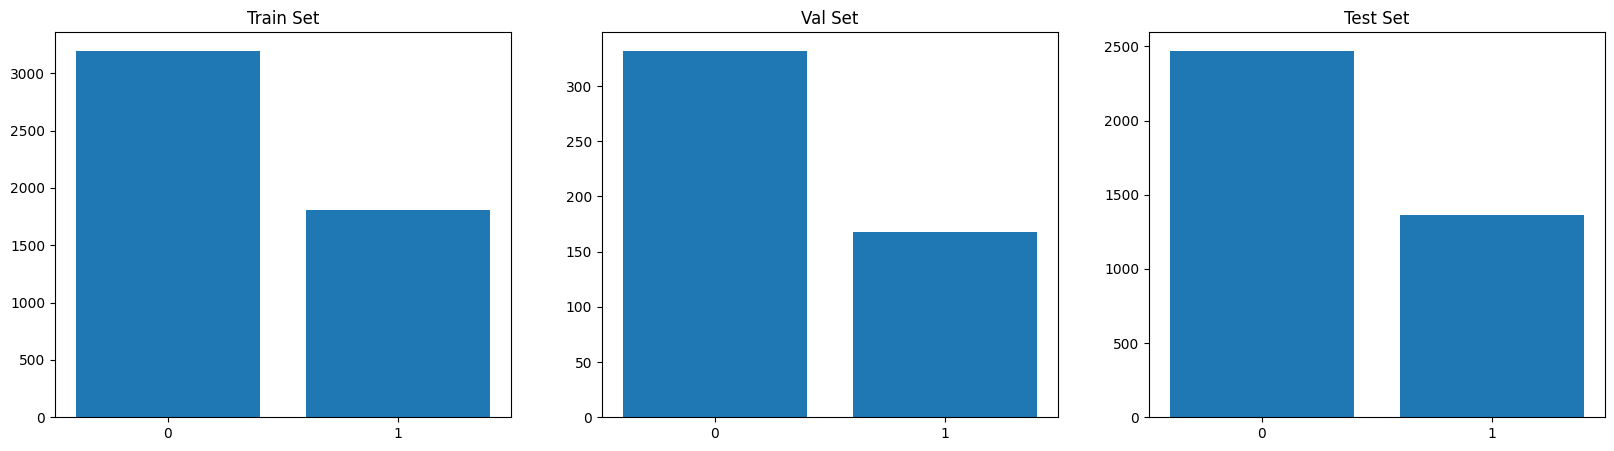

In [26]:
f, ax = plt.subplots(1, 3, figsize = (20, 5))

ax[0].bar(pd.Series(df_train['Label'].value_counts().index).astype('str'), df_train['Label'].value_counts().values)
ax[0].set_title('Train Set')

ax[1].bar(pd.Series(df_val['Label'].value_counts().index).astype('str'), df_val['Label'].value_counts().values)
ax[1].set_title('Val Set')

ax[2].bar(pd.Series(df_test['Label'].value_counts().index).astype('str'), df_test['Label'].value_counts().values)
ax[2].set_title('Test Set')

plt.show()

# **4. Machine learning models**

In [27]:
X_train = df_train.drop(columns = 'Label')
y_train = df_train['Label']

X_val = df_val.drop(columns = 'Label')
y_val = df_val['Label']

X_test = df_test.drop(columns = 'Label')
y_test = df_test['Label']

In [28]:
from sklearn.model_selection import cross_val_score

def model_accuracy_cv(model, X_test, y_test):
    return cross_val_score(model, X_test, y_test, cv = 10, scoring = 'accuracy').mean()

def model_accuracy(model, X_test, y_test):
    y_pred = model.predict(X_test)

    c = 0

    for true, pred in zip(y_test, y_pred):
        if true == pred:
            c += 1

    return c / len(y_test)

In [29]:
model_results_cv = {}
model_results = {}

## **4.1. CatBoost - All Features**

In [30]:
import catboost as cb

In [31]:
cat_cols = [col for col in df.columns if (df[col].nunique() <= 2) and (col != 'Label')]

for col in ['DMDMARTL', 'RIDEXPRG', 'AIALANGA', 'SDMVPSU', 'DMDHRMAR', 'DMDMARTZ',
            'MCQ530', 'CDQ002', 'PEASCST1', 'BPAARM', 'BMDSTATS', 'PHDSESN']:
  cat_cols.append(col)

In [32]:
model = cb.CatBoostClassifier(iterations = 500, depth = 9, learning_rate = 0.1, random_seed = 1204, thread_count = -1, verbose = False)
model.fit(X_train, y_train, cat_features = cat_cols, eval_set = (X_val, y_val), plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [33]:
print(f"Accuracy: {model_accuracy(model, X_test, y_test)}")

model_results['CatBoost - All Features'] = model_accuracy(model, X_test, y_test)

model = cb.CatBoostClassifier(iterations = 500, depth = 9, learning_rate = 0.1, random_seed = 1204, thread_count = -1, verbose = False)
model_results_cv['CatBoost - All Features'] = model_accuracy_cv(model, df.drop(columns = 'Label'), df['Label'])

Accuracy: 0.8280720062614141


## **4.2. Gradient Boosting - All Features**

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [35]:
print(f"Accuracy: {model_accuracy(model, X_test, y_test)}")

model_results['Gradient Boosting - All Features'] = model_accuracy(model, X_test, y_test)

model = GradientBoostingClassifier()
model_results_cv['Gradient Boosting - All Features'] = model_accuracy_cv(model, df.drop(columns = 'Label'), df['Label'])

Accuracy: 0.8197234542134099


## **4.3. XGBoost - All Features**

In [36]:
from xgboost import XGBClassifier

model = XGBClassifier(objective = 'binary:logistic')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:
print(f"Accuracy: {model_accuracy(model, X_test, y_test)}")

model_results['XGBoost - All Features'] = model_accuracy(model, X_test, y_test)

model = XGBClassifier(objective = 'binary:logistic')
model_results_cv['XGBoost - All Features'] = model_accuracy_cv(model, df.drop(columns = 'Label'), df['Label'])

Accuracy: 0.8181581007044091


## **4.4. Logistic Regression - All Features**

In [38]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(n_jobs = -1)
model.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [39]:
print(f"Accuracy: {model_accuracy(model, X_test, y_test)}")

model_results['Logistic Regression - All Features'] = model_accuracy(model, X_test, y_test)

model = LogisticRegression(n_jobs = -1)
model_results_cv['Logistic Regression - All Features'] = model_accuracy_cv(model, df.drop(columns = 'Label'), df['Label'])

Accuracy: 0.693973388990347


## **4.5. Support Vector Machine (SVM) - All Features**

In [40]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

SVC()

In [41]:
print(f"Accuracy: {model_accuracy(model, X_test, y_test)}")

model_results['SVM - All Features'] = model_accuracy(model, X_test, y_test)

model = SVC()
model_results_cv['SVM - All Features'] = model_accuracy_cv(model, df.drop(columns = 'Label'), df['Label'])

Accuracy: 0.6444038612053222


## **4.6. Random Forest - All Features**

In [42]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs = -1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [43]:
print(f"Accuracy: {model_accuracy(model, X_test, y_test)}")

model_results['Random Forest - All Features'] = model_accuracy(model, X_test, y_test)

model = RandomForestClassifier(n_jobs = -1)
model_results_cv['Random Forest - All Features'] = model_accuracy_cv(model, df.drop(columns = 'Label'), df['Label'])

Accuracy: 0.8304200365249153


## **4.7. Feature Selection - 30 Features**

In [44]:
cols = pd.read_csv('Codebook.csv')['Variable Name'].tolist()

cols = [col for col in cols if col not in ['SEQN', 'DMDYRSUS', 'INDFMPIR', 'SDDSRVYR', 'LBDSTBSI', 'BPD035', 'MCQ180A', 'MCQ195', 'RIDRETH1', 'RIDRETH3']]

X_train = X_train[cols]
X_val = X_val[cols]
X_test = X_test[cols]

cat_cols = [col for col in cat_cols if col in cols]

In [45]:
model = cb.CatBoostClassifier(iterations = 500, depth = 9, learning_rate = 0.1, random_seed = 1204, thread_count = -1)
model.fit(X_train, y_train, cat_features = cat_cols, eval_set = (X_val, y_val), plot = True, verbose = False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [46]:
col_info = pd.read_csv('Codebook.csv')
fii = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_}).sort_values(by = 'Importance', ascending = False)

fi = fii.iloc[0:30]

fi = pd.merge(fi, col_info, left_on = 'Feature', right_on = 'Variable Name', how = 'left').drop(columns = ['Variable Name'])

print(tabulate(fi, headers = 'keys', tablefmt = 'psql'))

+----+-----------+--------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------+----------------------------------------+
|    | Feature   |   Importance | Variable Description                                                                                                                                                                                                                                       | Data File Name   | Data File Description                  |
|----+-----------+--------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------+-

In [47]:
cols = fi['Feature'].tolist()

X_train = X_train[cols]
X_val = X_val[cols]
X_test = X_test[cols]

cat_cols = [col for col in cat_cols if col in cols]

In [48]:
model = cb.CatBoostClassifier(iterations = 500, depth = 9, learning_rate = 0.1, random_seed = 1204, thread_count = -1, verbose = False)
model.fit(X_train, y_train, cat_features = cat_cols, eval_set = (X_val, y_val), plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [49]:
fii = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_}).sort_values(by = 'Importance', ascending = False)

fi = fii.iloc[0:30]

fi = pd.merge(fi, col_info, left_on = 'Feature', right_on = 'Variable Name', how = 'left').drop(columns = ['Variable Name'])

fi.to_csv('model_features_mean.csv', index = False)

with open('model_mean.pkl', 'wb') as f:
  pkl.dump(model, f)

In [50]:
print(f"Accuracy: {model_accuracy(model, X_test, y_test)}")

model_results['CatBoost - 30 Features'] = model_accuracy(model, X_test, y_test)

model = cb.CatBoostClassifier(iterations = 500, depth = 9, learning_rate = 0.1, random_seed = 1204, thread_count = -1, verbose = False)
model_results_cv['CatBoost - 30 Features'] = model_accuracy_cv(model, df[cols], df['Label'])

Accuracy: 0.8296373597704149


## **4.8. Gradient Boosting - 30 Features**

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [52]:
print(f"Accuracy: {model_accuracy(model, X_test, y_test)}")

model_results['Gradient Boosting - 30 Features'] = model_accuracy(model, X_test, y_test)

model = GradientBoostingClassifier()
model_results_cv['Gradient Boosting - 30 Features'] = model_accuracy_cv(model, df[cols], df['Label'])

Accuracy: 0.8178972084529089


## **4.9. XGBoost - 30 Features**

In [53]:
from xgboost import XGBClassifier

model = XGBClassifier(objective = 'binary:logistic', n_jobs = -1)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [54]:
print(f"Accuracy: {model_accuracy(model, X_test, y_test)}")

model_results['XGBoost - 30 Features'] = model_accuracy(model, X_test, y_test)

model = XGBClassifier(objective = 'binary:logistic', n_jobs = -1)
model_results_cv['XGBoost - 30 Features'] = model_accuracy_cv(model, df[cols], df['Label'])

Accuracy: 0.813983824680407


## **4.10. Logistic Regression - 30 Features**

In [55]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(n_jobs = -1)
model.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [56]:
print(f"Accuracy: {model_accuracy(model, X_test, y_test)}")

model_results['Logistic Regression - 30 Features'] = model_accuracy(model, X_test, y_test)

model = LogisticRegression(n_jobs = -1)
model_results_cv['Logistic Regression - 30 Features'] = model_accuracy_cv(model, df[cols], df['Label'])

Accuracy: 0.7910253065483955


## **4.11. Support Vector Machine (SVM) - 30 Features**

In [57]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

SVC()

In [58]:
print(f"Accuracy: {model_accuracy(model, X_test, y_test)}")

model_results['SVM - 30 Features'] = model_accuracy(model, X_test, y_test)

model = SVC()
model_results_cv['SVM - 30 Features'] = model_accuracy_cv(model, df[cols], df['Label'])

Accuracy: 0.747978085050874


## **4.12. Random Forest - 30 Features**

In [59]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs = -1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [60]:
print(f"Accuracy: {model_accuracy(model, X_test, y_test)}")

model_results['Random Forest - 30 Features'] = model_accuracy(model, X_test, y_test)

model = RandomForestClassifier(n_jobs = -1)
model_results_cv['Random Forest - 30 Features'] = model_accuracy_cv(model, df[cols], df['Label'])

Accuracy: 0.8322462822854161


## **4.13. Total Accuracy**

In [61]:
models = [model.split(' - ')[0] for model in list(model_results.keys())]
features = [model.split(' - ')[1] for model in list(model_results.keys())]
accuracy = list(model_results.values())

df_acc = pd.DataFrame({'Model': models, 'Feature': features, 'Accuracy': accuracy})

df_acc.pivot(index = 'Model', columns = 'Feature', values = 'Accuracy')

Feature,30 Features,All Features
Model,,
CatBoost,0.829637,0.828072
Gradient Boosting,0.817897,0.819723
Logistic Regression,0.791025,0.693973
Random Forest,0.832246,0.830420
SVM,0.747978,0.644404
XGBoost,0.813984,0.818158


In [62]:
models = [model.split(' - ')[0] for model in list(model_results_cv.keys())]
features = [model.split(' - ')[1] for model in list(model_results_cv.keys())]   
accuracy = list(model_results_cv.values())

df_acc_cv = pd.DataFrame({'Model': models, 'Feature': features, 'Accuracy': accuracy})

df_acc_cv.pivot(index = 'Model', columns = 'Feature', values = 'Accuracy')

Feature,30 Features,All Features
Model,,
CatBoost,0.843779,0.856638
Gradient Boosting,0.820958,0.823529
Logistic Regression,0.799528,0.711666
Random Forest,0.847959,0.847637
SVM,0.760097,0.642880
XGBoost,0.825350,0.845066


In [63]:
df_acc = df_acc.pivot(index = 'Model', columns = 'Feature', values = 'Accuracy')

In [64]:
df_acc_cv = df_acc_cv.pivot(index = 'Model', columns = 'Feature', values = 'Accuracy')

## **4.14. Feature Importance**

In [65]:
from sklearn.feature_selection import mutual_info_classif

# Separate the features and the target variable
X = df.drop(columns = ['Label'])
y = df['Label']

# Calculate the information gain for each feature
feature_importance = mutual_info_classif(X, y)

# Create a dataframe to store the feature importance
fi = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the dataframe by importance in descending order
fi = fi.sort_values(by = 'Importance', ascending = False)

# Print the feature importance
print(fi)

      Feature  Importance
2    RIDAGEYR    0.139474
96    BPQ040A    0.097064
97    BPQ050A    0.088043
105   BPQ100D    0.086190
94     BPQ020    0.085246
..        ...         ...
90    MCQ371B    0.000000
153  BPXOPLS1    0.000000
74    MCQ370D    0.000000
73    MCQ370C    0.000000
0    RIDSTATR    0.000000

[229 rows x 2 columns]


In [66]:
fi[fi['Importance'] > 0.01]

,Feature,Importance
2,RIDAGEYR,0.139474
96,BPQ040A,0.097064
97,BPQ050A,0.088043
105,BPQ100D,0.086190
94,BPQ020,0.085246
...,...,...
172,WTSAF2YR,0.010319
50,MCQ084,0.010270
7,DMDEDUC2,0.010247
115,ALQ141Q,0.010236
